<font size=4 >First load the required libraries.</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

1.load and view data
===

In [2]:
# Read Data form local file path
marketing_df = pd.read_csv("marketing_data.csv")

In [3]:
# Display the data shape
marketing_df.shape

(2240, 28)

In [4]:
# View database column types
marketing_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
# Display the first five rows 
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


<font size=4 >I converted the income column to numeric format.</font>

In [6]:
# clean up column names that contain whitespace
marketing_df.columns = marketing_df.columns.str.replace(' ', '')

# transform 'Income' column to numeric format
marketing_df['Income'] = marketing_df['Income'].str.replace('$', '')
marketing_df['Income'] = marketing_df['Income'].str.replace(',', '').astype('float')

In [7]:
# Display the first five rows 
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


2.EDA
===

2.1 View default values and fill in default values
---

In [8]:
# View missing values 
marketing_df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

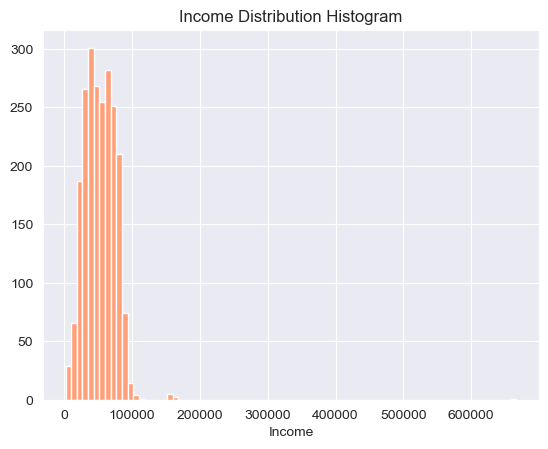

In [9]:
# Draw an income histogram
sns.set_style('darkgrid')
plt.hist(marketing_df.Income,bins=80,color=['lightsalmon'])

plt.title("Income Distribution Histogram")
plt.xlabel("Income")

plt.show()

<font size=4 >I decided to populate these default values with median values</font>

In [10]:
marketing_df['Income'].fillna(marketing_df['Income'].median(),inplace = True)

2.2 View outliers
---

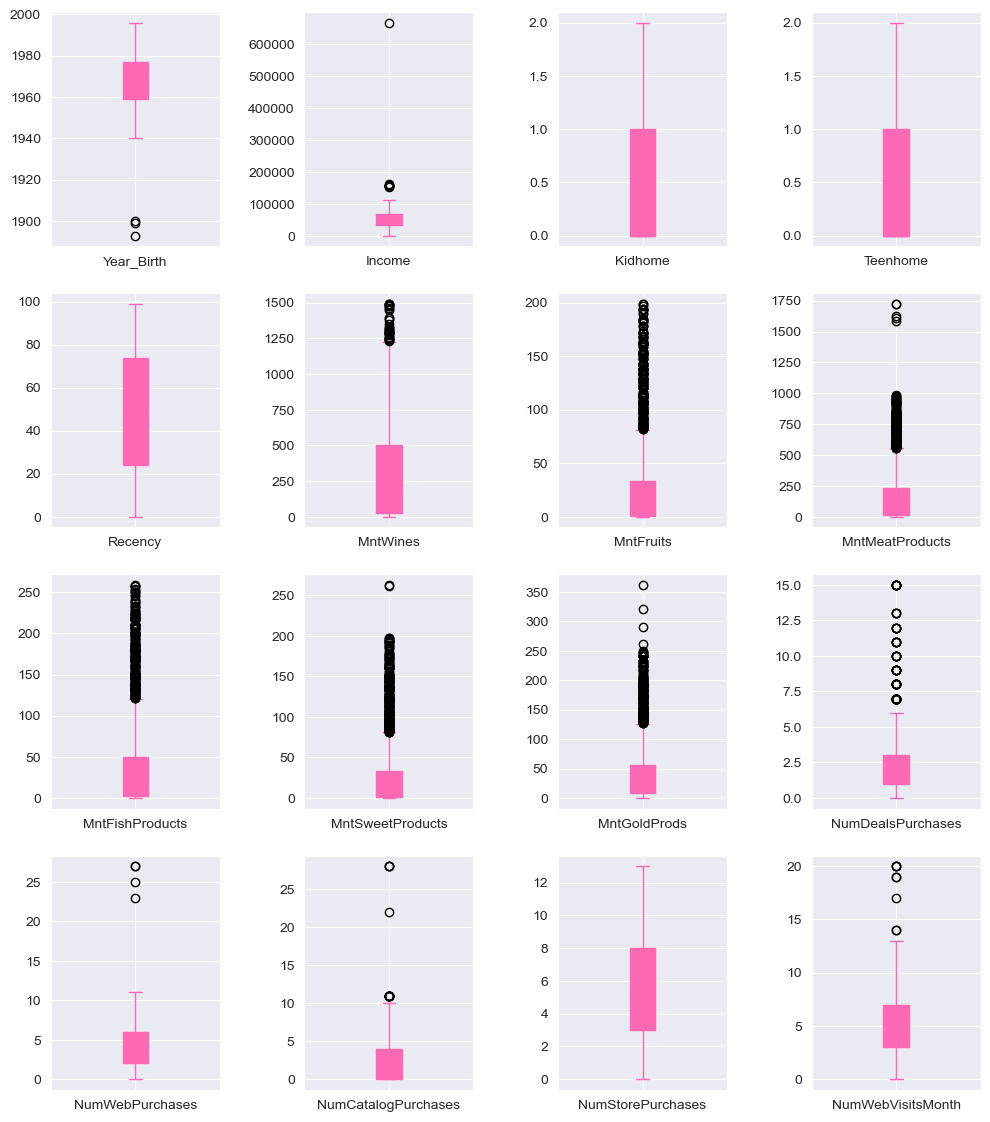

In [11]:
# select columns to plot
plot_list = marketing_df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 
                                       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                                       'Response', 'Complain']).select_dtypes(include=np.number)

# subplots
plot_list.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), 
               patch_artist=True,color = 'hotpink')
plt.subplots_adjust(wspace=0.5);

<font size=4 >It can be seen that outliers appear in 'Year_Birth', I decided to remove these two outliers.</font>

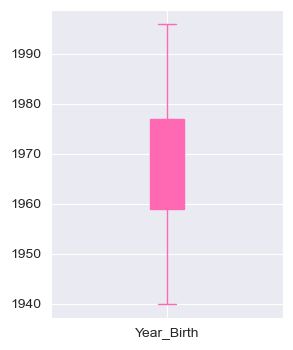

In [12]:
# remove outliers
marketing_df = marketing_df[marketing_df['Year_Birth'] > 1900].reset_index(drop=True)

plt.figure(figsize=(3,4))
marketing_df['Year_Birth'].plot(kind='box', patch_artist=True,color = 'hotpink');

2.3 Convert Format
---

In [13]:
# View database column types
marketing_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

<font size=4 >The 'Dt_Customer' attribute should be converted to datetime.</font>

In [14]:
# Convert 'Dt_Customer' to datetime
marketing_df['Dt_Customer'] = pd.to_datetime(marketing_df['Dt_Customer'])

2.4 Feature Engineering
---

<font size=4 >Looking at the individual properties, I identified five characteristics that can be analyzed:</font>

<font size=4 >1.Children_number: total number of children in the family</font>

<font size=4 >2.Customer_Year: the year you became a customer</font>

<font size=4 >3.Total_Mnt: the total cost of purchasing various products</font>

<font size=4 >4.Total_Purchases: the number of all payments</font>

<font size=4 >5.Total_Campaigns: The total number of customer acceptance campaigns</font>

In [15]:
# Children_number
marketing_df['Children_number'] = marketing_df['Kidhome'] + marketing_df['Teenhome']

# Customer_Year
marketing_df['Customer_Year'] = pd.DatetimeIndex(marketing_df['Dt_Customer']).year

# Total_Mnt
mnt_cols = [col for col in marketing_df.columns if 'Mnt' in col]
marketing_df['Total_Mnt'] = marketing_df[mnt_cols].sum(axis=1)

# Total_Purchases
purchases_cols = [col for col in marketing_df.columns if 'Purchases' in col]
marketing_df['Total_Purchases'] = marketing_df[purchases_cols].sum(axis=1)

# Total_Campaigns
campaigns_cols = [col for col in marketing_df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
marketing_df['Total_Campaigns'] = marketing_df[campaigns_cols].sum(axis=1)

# view new features, by customer ID
marketing_df[['ID', 'Children_number', 'Customer_Year', 'Total_Mnt', 'Total_Purchases', 'Total_Campaigns']].head()

,ID,Children_number,Customer_Year,Total_Mnt,Total_Purchases,Total_Campaigns
0,1826,0,2014,1190,15,1
1,1,0,2014,577,18,2
2,10476,1,2014,251,11,0
3,1386,2,2014,11,4,0
4,5371,1,2014,91,8,2


<font size=4 >Save the data in csv format for subsequent processing.</font>

In [16]:
# Save file
marketing_df.to_csv("marketing_feature_df.csv",index = False)

2.5 Feature Correlation
---

In [17]:
# Drop column 'ID'
marketing_drop_ID = marketing_df.drop(columns='ID')

In [18]:
# Pick out numeric attributes
numerical_df = marketing_drop_ID.select_dtypes(include=('int64','float64'))

In [19]:
# Computes correlations between numeric attributes
marketing_corr = numerical_df.corr(method = 'kendall')

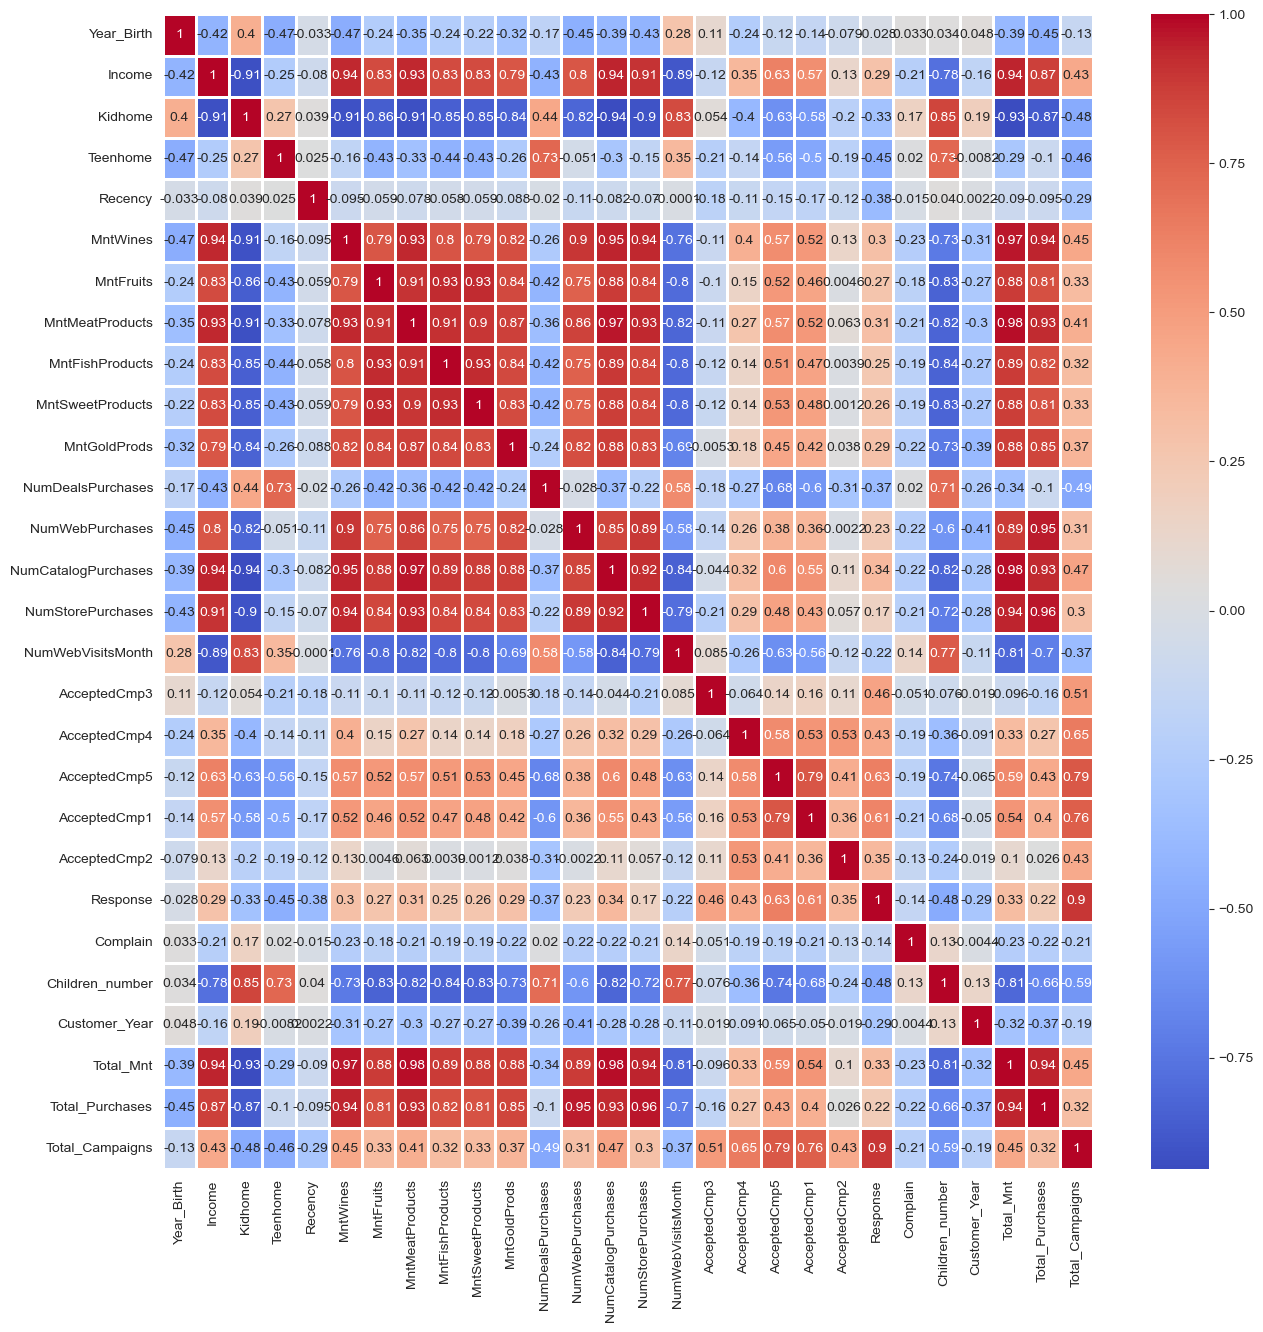

In [20]:
# Plot a heat map of correlations between numeric attributes
fig = plt.figure(figsize=(15,15))
ax = sns.heatmap(marketing_corr.corr(), cmap="coolwarm",annot=True,linewidth =1)

<font size=4 >Heatmap can reveal three categories of related features:</font>

<font size=4 >1.Features positively correlated with 'Income':
All features of 'Mnt' and 'Purchases' show a positive correlation with 'Income.' This means that the more income someone has, the greater the quantity and price of their purchases.</font>

<font size=4 >2.Features related to 'Children_number':
All features of 'Mnt' and 'Purchases' show a negative correlation with 'Children_number.' This indicates that the more children someone has, the fewer items they purchase, and the lower the prices.</font>

<font size=4 >However, an exception is 'NumDealsPurchases,' which is positively correlated with 'Children_number.' 'Income' is negatively correlated with 'Children_number.'</font>

<font size=4 >3.Features related to activity acceptance:
Activity acceptance has a strong correlation with 'Response'*(target).
Activity acceptance has a weak positive correlation with 'Income' and a weak negative correlation with 'Children_number.'</font>


<font size=4 >Exception:</font>

<font size=4 >There is no correlation between 'NumWebVisitsMonth' and 'NumWebPurchases.'
However, there is a positive correlation between 'NumDealsPurchases' and 'Children_number.</font>

Perform visual analysis of the above analysis separately
---

<font size=4 >1) 'Income'and 'Total_Mnt'</font>

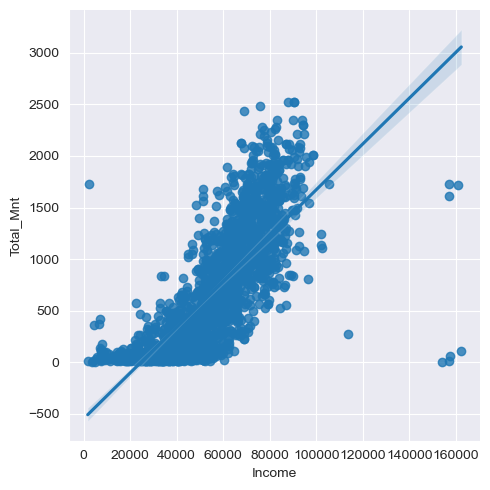

In [21]:
# lmplot of the relationship between 'Income' and 'Total_Mnt'
sns.lmplot(x='Income', y='Total_Mnt', data=marketing_df[marketing_df['Income'] < 200000],palette = ['ffd1b3'])

<font size=4 >It can be observed that there is a positive correlation between income and total spending. The higher the income, the higher the total expenditure.</font>

<font size=4 >2) 'Children_number'and 'Total_Mnt'</font>

<Axes: xlabel='Children_number', ylabel='Total_Mnt'>

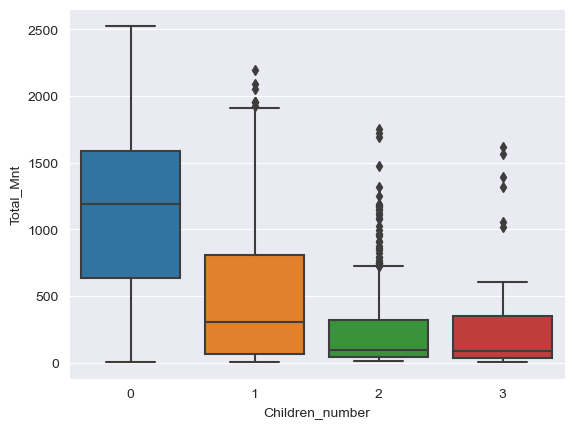

In [22]:
# Boxplot of the relationship between 'Children_number' and 'Total_Mnt'
sns.boxplot(x='Children_number', y='Total_Mnt', data=marketing_df)

<font size=4 >It can be observed that there is a negative correlation between the number of children a customer has and the total spending. The more children they have, the less they spend.</font>

<font size=4 >3) 'Children_number' and 'NumDealsPurchases'</font>

<Axes: xlabel='Children_number', ylabel='NumDealsPurchases'>

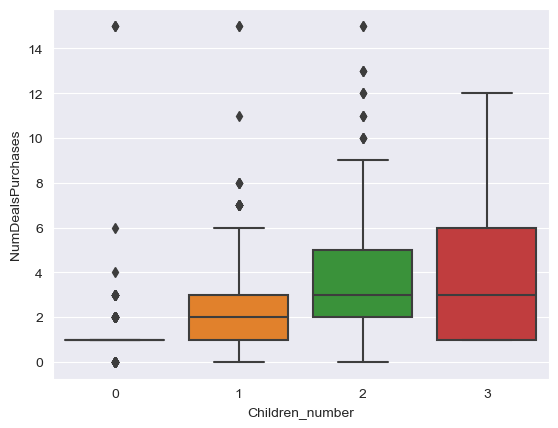

In [23]:
# Boxplot of the relationship between 'Children_number' and 'NumDealsPurchases'
sns.boxplot(x='Children_number', y='NumDealsPurchases', data=marketing_df)

<font size=4 > It can be observed that there is a weak positive correlation between the number of children a customer has and the frequency of purchases. As the number of children increases, there is a slight increase in the number of purchases. </font>

<font size=4 >4) 'Total_Campaigns' and 'Income'</font>

<Axes: xlabel='Total_Campaigns', ylabel='Income'>

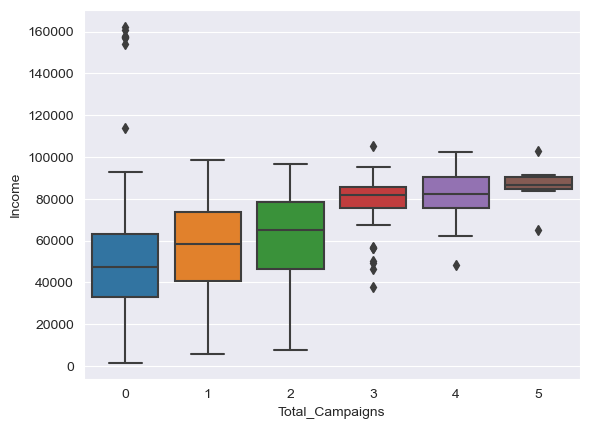

In [24]:
# Boxplot of the relationship between 'Total_Campaigns' and 'Income'
sns.boxplot(x='Total_Campaigns', y='Income', data=marketing_df[marketing_df['Income']<200000])

<font size=4 > It can be observed that there is a weak positive correlation between the frequency of customer participation in activities and income. As income increases, there is a slight increase in the number of times they participate in activities.</font>

<font size=4 >5) 'Total_Campaigns' and 'Children_number' </font>

<Axes: xlabel='Total_Campaigns', ylabel='Children_number'>

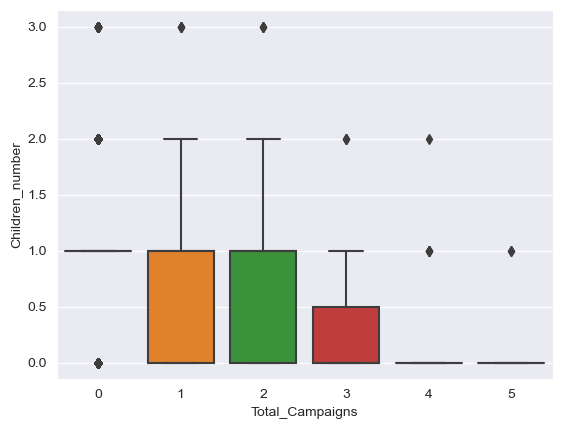

In [25]:
# Boxplot of the relationship between  'Total_Campaigns' and 'Children_number'
sns.boxplot(x='Total_Campaigns', y='Children_number', data=marketing_df)

<font size=4 >It can be observed that the frequency of customer participation in activities does not show a significant correlation with the number of children they have.</font>

<font size=4 >6) 'NumWebVisitsMonth' and 'NumWebPurchases' </font>

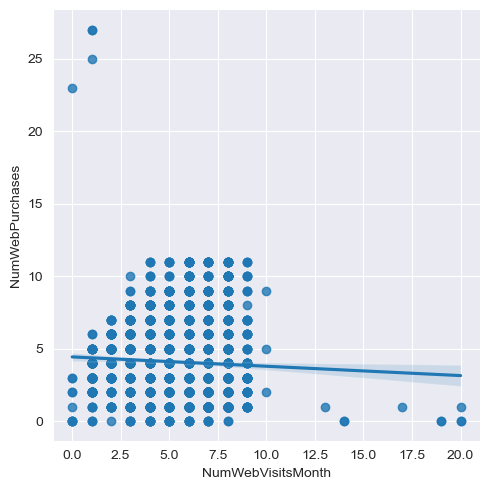

In [26]:
# Implot of the relationship between  'NumWebVisitsMonth' and 'NumWebPurchases'
sns.lmplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=marketing_df)

<font size=4 >It can be observed that there is no significant correlation between customer web page click rate and the number of online purchases.</font>

<font size=4 >7) 'NumWebVisitsMonth' and 'NumDealsPurchases' </font>

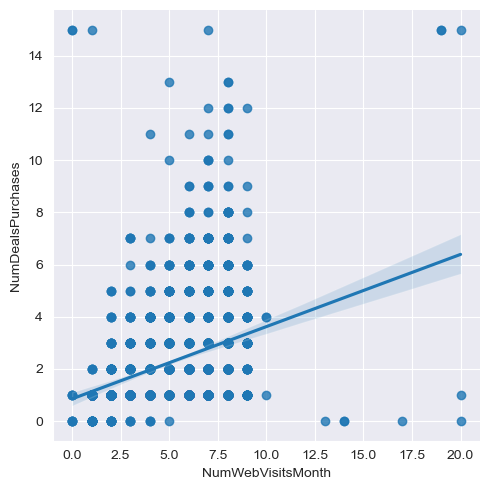

In [27]:
# Implot of the relationship between  'NumWebVisitsMonth' and 'NumDealsPurchases'
sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=marketing_df);

<font size=4 >It can be observed that there is a clear positive correlation between customer web click rate and the total number of purchases made by the customer.</font>